In [88]:
from matplotlib import pyplot as plt
import numpy as np
import random
import math

t = 1
n = 10000
dt = t/n

dw = np.sqrt(dt)*np.random.randn(1, n)
w = np.cumsum(dw)
integrand = np.zeros(n, dtype='float')
integrand[1:] = w[:-1]
ito = np.sum(integrand*dw)
strat = np.sum((0.5*(integrand+w) + 0.5*np.sqrt(dt)*np.random.randn(1,n))*dw)
itoerr = np.abs(ito - 0.5*(w[n-1]**2-t))
straterr = np.abs(strat - 0.5*w[n-1]**2)

print(ito, strat, itoerr, straterr)

-0.2347591246206349 0.27478543340687134 0.0020830228892391445 0.007461535138267084


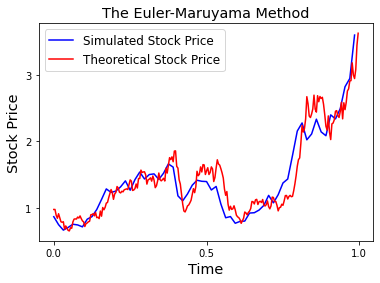

Error: 0.027132314292905857


In [48]:
from matplotlib import pyplot as plt
import numpy as np
import random
import math

l = 2
u = 1
Xzero = 1
t = 1
n = 256
dt = 1/n
dw = np.sqrt(dt)*np.random.randn(1, n)
w = np.cumsum(dw)
times = []
for i in range(1, n+1):
    times.append(i/n)
times = np.array(times)
Xtrue = Xzero*np.exp((l-0.5*u**2)*(times) + u*w)

r = 4
Dt = r*dt
la = n//r
Xem = np.zeros(la+1, dtype = 'float')
Xem[0] = Xzero
Xtemp = Xzero
for j in range(1, la+1):
    Winc = np.sum(dw[0][r*(j-1)+1:r*j])
    Xtemp = Xtemp + (Dt*l*Xtemp) + (u*Xtemp*Winc)
    Xem[j] = Xtemp
    
ax = plt.subplot()
ax.locator_params(axis='y', nbins=6)
ax.locator_params(axis='x', nbins=4)
plt.plot(np.arange(0, t, Dt), Xem[1:], color = 'blue', linestyle = 'solid', label = 'Simulated Stock Price')
plt.plot(np.arange(0, t, dt), Xtrue, color = 'red', linestyle = 'solid', label = 'Theoretical Stock Price')
plt.title("The Euler-Maruyama Method", fontsize = 'x-large')
plt.ylabel("Stock Price", fontsize = 'x-large')
plt.xlabel("Time", fontsize = 'x-large')
ax.legend(fontsize = 12)
plt.savefig('hi2.png', dpi=1200)
plt.show()

emerr = np.abs(Xem[-1]-Xtrue[-1])
print("Error:", emerr)

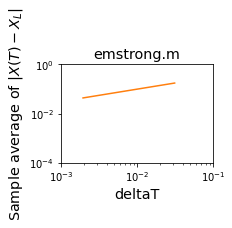

In [47]:
from matplotlib import pyplot as plt
import numpy as np
import random
import math

l = 2
u = 1
Xzero = 1
t = 1
n = 512
m = 1000
Xerr = np.zeros((5, m), dtype = "float")
dt = 1/n
for s in range(m):
    dw = np.sqrt(dt)*np.random.randn(1, n)
    w = np.cumsum(dw)
    Xtrue = Xzero*np.exp((l-0.5*u**2) + u*w)
    for p in range(5):
        R = 2**(p-1)
        Dt = R*dt
        L = n/R
        Xtemp = Xzero
        for j in range(int(L)):
            Winc = np.sum(dw[0][r*(j-1):r*j+1]) 
            Xtemp = Xtemp + (Dt*l*Xtemp) + (u*Xtemp*Winc)
        Xerr[p][s] = abs(Xtemp - Xtrue[n-1])

Dtvals = dt*np.power(2, [0, 1, 2, 3, 4])        
plt.subplot(2, 2, 1)
plt.loglog(Dtvals, [np.mean(Xerr[0]), np.mean(Xerr[1]), np.mean(Xerr[2]), np.mean(Xerr[3]), np.mean(Xerr[4])])
plt.loglog(Dtvals, np.power(Dtvals, 0.5))
plt.axis([1e-3, 1e-1, 1e-4, 1])
plt.title("emstrong.m", fontsize = 'x-large')
plt.ylabel("Sample average of $| X(T) - X_L |$", fontsize = 'x-large')
plt.xlabel("deltaT", fontsize = 'x-large')
plt.show()